In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

### 讀入series
df = pd.read_csv('Stocker/price.csv', index_col='date', parse_dates=['date'])
price = df.squeeze()
price.head()

date
2000-01-04    178.0
2000-01-05    182.0
2000-01-06    178.0
2000-01-07    173.0
2000-01-10    179.0
Name:  price, dtype: float64

In [3]:
print(df)
print(df.squeeze)


             price
date              
2000-01-04   178.0
2000-01-05   182.0
2000-01-06   178.0
2000-01-07   173.0
2000-01-10   179.0
2000-01-11   176.0
2000-01-12   181.0
2000-01-13   178.0
2000-01-14   182.0
2000-01-15   188.0
2000-01-17   187.0
2000-01-18   184.0
2000-01-19   184.0
2000-01-20   182.0
2000-01-21   186.0
2000-01-24   188.0
2000-01-25   193.0
2000-01-26   206.0
2000-01-27   208.0
2000-01-28   204.0
2000-01-29   200.0
2000-01-31   203.0
2000-02-01   202.0
2000-02-09   211.0
2000-02-10   214.0
2000-02-11   219.0
2000-02-14   214.0
2000-02-15   215.0
2000-02-16   213.0
2000-02-17   211.0
...            ...
2019-01-12   217.5
2019-01-13   220.5
2019-01-14   218.5
2019-01-15   221.0
2019-01-16   223.0
2019-01-17   220.5
2019-01-18   222.5
2019-01-19   226.0
2019-01-20   229.0
2019-01-21   222.5
2019-01-22   221.0
2019-02-11   228.0
2019-02-12   230.0
2019-02-13   229.0
2019-02-14   227.0
2019-02-15   227.0
2019-02-16   230.0
2019-02-17   229.0
2019-02-18   234.5
2019-02-19  

In [4]:
from Stocker.stocker import Stocker
tsmc = Stocker(price)

the stock Stocker Initialized. Data covers 2000-01-04 00:00:00 to 2019-03-08 00:00:00.


Predicted Price on 2019-06-06 00:00:00 = $222.22


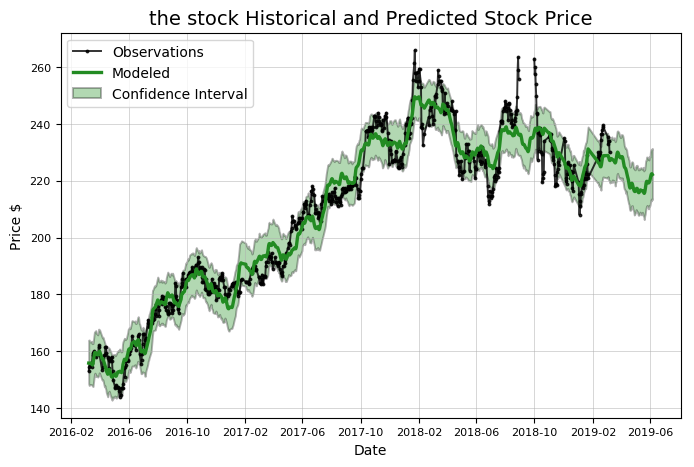

In [5]:
model, model_data = tsmc.create_prophet_model(days=90)


Prediction Range: 2018-03-08 00:00:00 to 2019-03-08 00:00:00.

Predicted price on 2019-03-07 00:00:00 = $314.02.
Actual price on    2019-03-07 00:00:00 = $234.00.

Average Absolute Error on Training Data = $3.32.
Average Absolute Error on Testing  Data = $51.35.

When the model predicted an increase, the price increased 38.64% of the time.
When the model predicted a  decrease, the price decreased  39.51% of the time.

The actual value was within the 80% confidence interval 3.88% of the time.


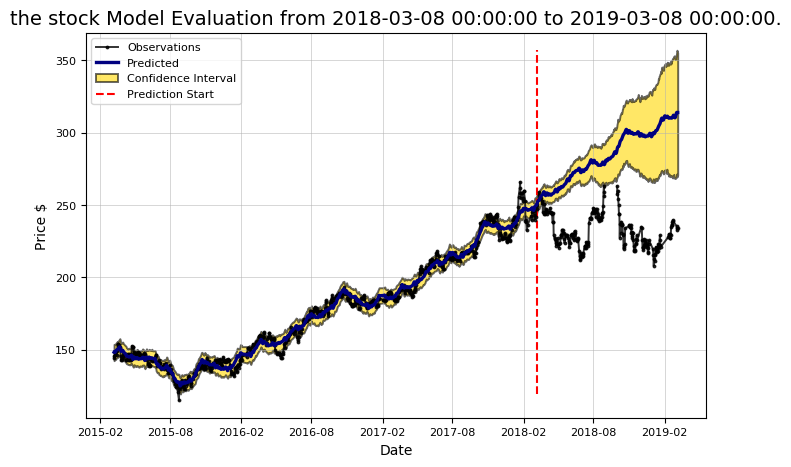

In [6]:
tsmc.evaluate_prediction()

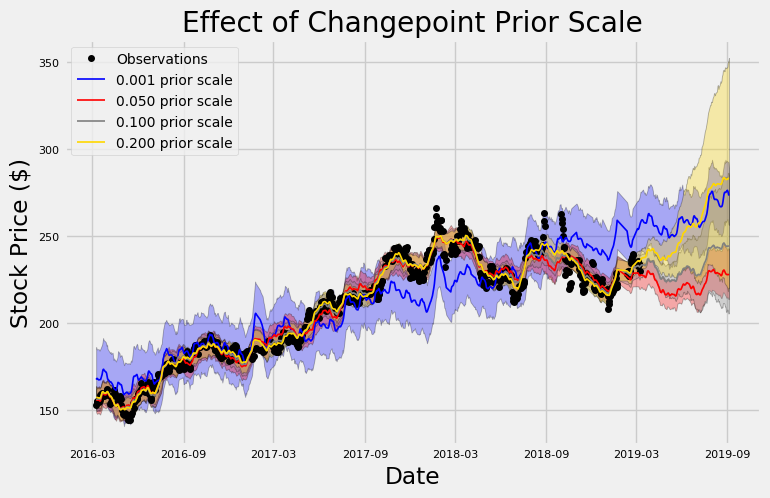

In [7]:
tsmc.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])


Predicted Increase: 

          Date    estimate    change       upper       lower
2   2019-03-10  236.079943  0.668746  241.785843  230.748079
3   2019-03-11  236.711662  0.631719  242.753140  230.789250
4   2019-03-12  237.202184  0.490522  243.381521  231.240180
5   2019-03-13  237.443629  0.241445  242.992460  231.372064
6   2019-03-14  237.523922  0.080292  243.023251  231.624383
7   2019-03-15  237.594940  0.071018  243.670861  231.624862
9   2019-03-17  237.808913  0.213974  243.704183  232.102094
10  2019-03-18  237.815921  0.007007  243.709207  232.164756
12  2019-03-20  238.015947  0.205598  243.955734  232.059242
13  2019-03-21  238.639021  0.623073  245.043061  233.180658
14  2019-03-22  239.674059  1.035038  246.241626  233.877313
16  2019-03-24  241.815320  2.141261  248.342986  236.188373
17  2019-03-25  242.305236  0.489916  248.457325  236.051142
18  2019-03-26  242.335086  0.029850  248.814093  236.008427
23  2019-03-31  241.793217  0.094745  248.305799  235.790222
2

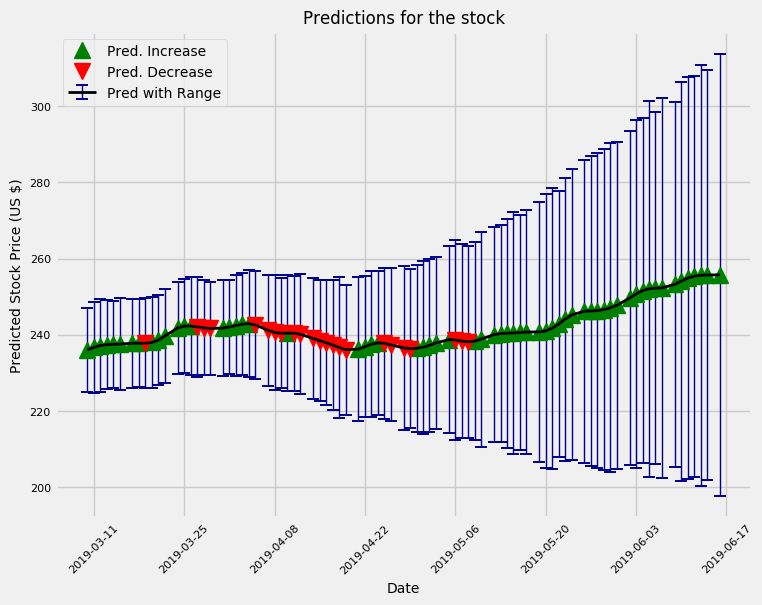

In [8]:
tsmc.predict_future(days=100)